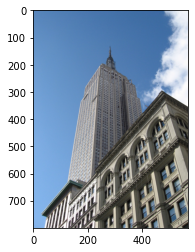

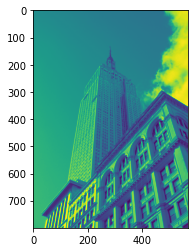

In [1]:
from PIL import Image
from pylab import *
from numpy import *
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from scipy.ndimage import measurements, morphology
import os

'''T1.1'''
pil_im1 = Image.open('empire.jpg')
figure()
imshow(pil_im1)
show()
#pil_im1.show()
pil_im2 = Image.open('empire.jpg').convert('L')
#pil_im2.show()
figure()
imshow(pil_im2)
show()

In [2]:
'''T1.2'''


def get_imlist(path):
    return [os.path.join(path, tmp) for tmp in os.listdir(path) if tmp.endswith('.bmp')]

filelist = get_imlist('.')

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)


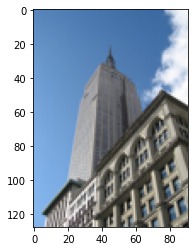

In [3]:
'''T1.3'''
pil_im3 = Image.open('empire.jpg')
pil_im3.thumbnail((128, 128))
imshow(pil_im3)
show()

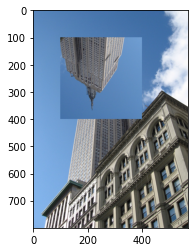

In [4]:
'''T1.4'''
pil_im4 = Image.open('empire.jpg')
box = (100, 100, 400, 400)
region = pil_im4.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im4.paste(region, box)
imshow(pil_im4)
show()

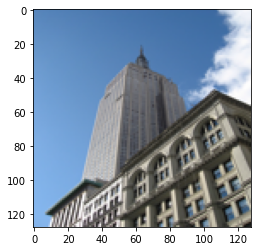

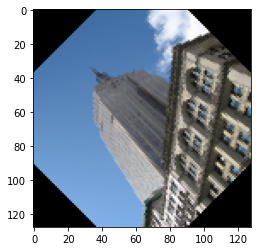

In [5]:
'''T1.5'''
pil_im5 = Image.open('empire.jpg')
out = pil_im5.resize((128, 128))
imshow(out)
show()

out = out.rotate(45)
imshow(out)
show()

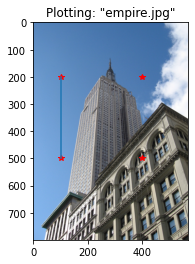

In [6]:
'''T2.1'''
im = array(Image.open('empire.jpg'))
imshow(im)
x = [100,100,400,400]
y = [200,500,200,500]
plot(x, y, 'r*')
plot(x[:2],y[:2])
title('Plotting: "empire.jpg"')
show()

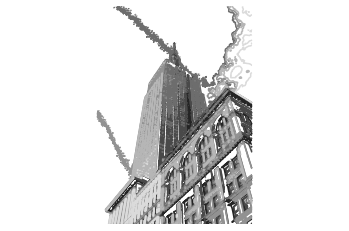

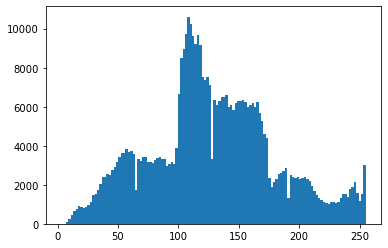

In [7]:
'''T2.2'''
im = array(Image.open('empire.jpg').convert('L'))
figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')
figure()
hist(im.flatten(),128)
show()

In [8]:
'''T3.1'''
im = array(Image.open('empire.jpg'))
print(im.shape, im.dtype)
im2 = array(Image.open('empire.jpg').convert('L'), 'f')
print(im2.shape, im2.dtype)

(800, 569, 3) uint8
(800, 569) float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


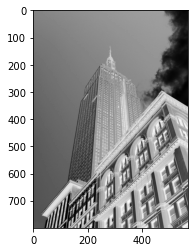

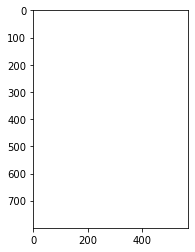

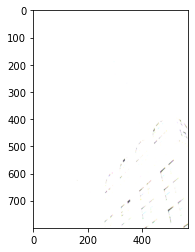

In [9]:
'''T3.2'''
im3 = 255 - im2
figure()
imshow(im3)
im4 = (100.0 / 255) * im + 100
figure()
imshow(im4)
im5 = 255.0 * (im / 255.0) ** 2
figure()
imshow(im5)
show()

In [10]:
'''T3.3'''
def imresize(im, sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))


im = Image.open('empire.jpg')
a = imresize(im, (100, 100))
print(a.shape, a.dtype)

(100, 100, 3) uint8


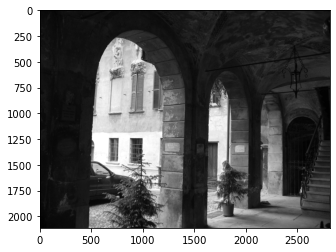

<ipython-input-12-bdbb30e27095>:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)


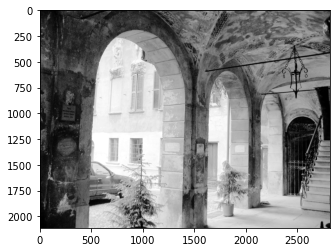

In [12]:
'''T3.4'''


def histeq(im, nbr_bins=256):
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

im = Image.open('AquaTermi_lowcontrast.jpg').convert('L')
imshow(im)
show()

im2, CDF = histeq(array(im))
figure()
imshow(im2)
show()

In [13]:
'''T3.5'''


def compute_average(imlist):
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    return array(averageim, 'uint8')

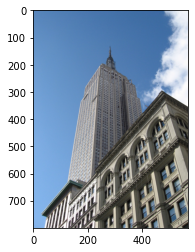

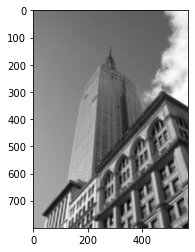

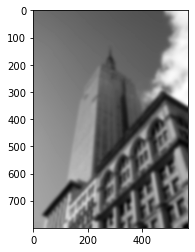

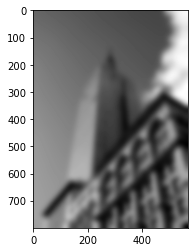

In [14]:
'''T4.1'''
im = Image.open('empire.jpg')
imshow(im)
show()
im = array(Image.open('empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 2)
figure()
imshow(im2)
im3 = filters.gaussian_filter(im, 5)
figure()
imshow(im3)
im4 = filters.gaussian_filter(im, 10)
figure()
imshow(im4)
show()

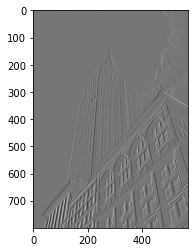

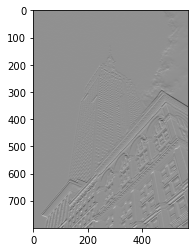

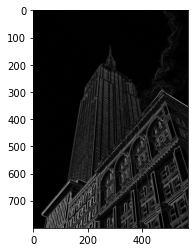

In [15]:
'''T4.2'''
im = array(Image.open('empire.jpg').convert('L'))
imx = zeros(im.shape)
filters.sobel(im,1,imx)
figure()
imshow(imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
figure()
imshow(imy)
magnitude = sqrt(imx**2+imy**2)
figure()
imshow(magnitude)
show()

Number of objects1: 45
Number of objects2: 48


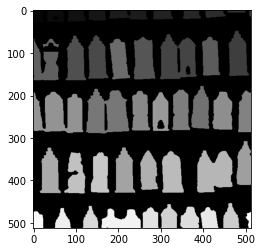

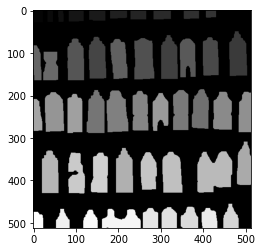

In [16]:
'''T4.3'''
im = array(Image.open('houses.png').convert('L'))
im = 1 * (im < 128)
labels, nbr_objects = measurements.label(im)
print("Number of objects1:", nbr_objects)
figure()
imshow(labels)
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)
figure()
imshow(labels_open)
print("Number of objects2:", nbr_objects_open)
show()